<a href="https://colab.research.google.com/github/asdfasdf0311/2023DataminingStudy/blob/main/ydms_week5_Ensemble_%26_Hyperparamete__bostonhousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YDMS 5주차 Ensemble & Hyperparamete_bostonhousing dataset** - 주하연

In [ ]:
from google.colab import drive #구글 드라이브에 데이터를 저장해서 데이터를 불러왔다.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split


In [ ]:
dat = pd.read_csv('/content/drive/MyDrive/ydms/dataset/BostonHousing.csv')

In [ ]:
dat.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X = dat.drop('medv', axis=1) #종속변수를 제외한 나머지 독립변수들
y = dat.loc[:,['medv']] #종속변수

In [ ]:
y = y.astype(int)

In [ ]:
plot_cols=['medv','crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']
plot_df=dat.loc[:,plot_cols]
plot_df.head()

,medv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


 Target(medv)과 상관관계

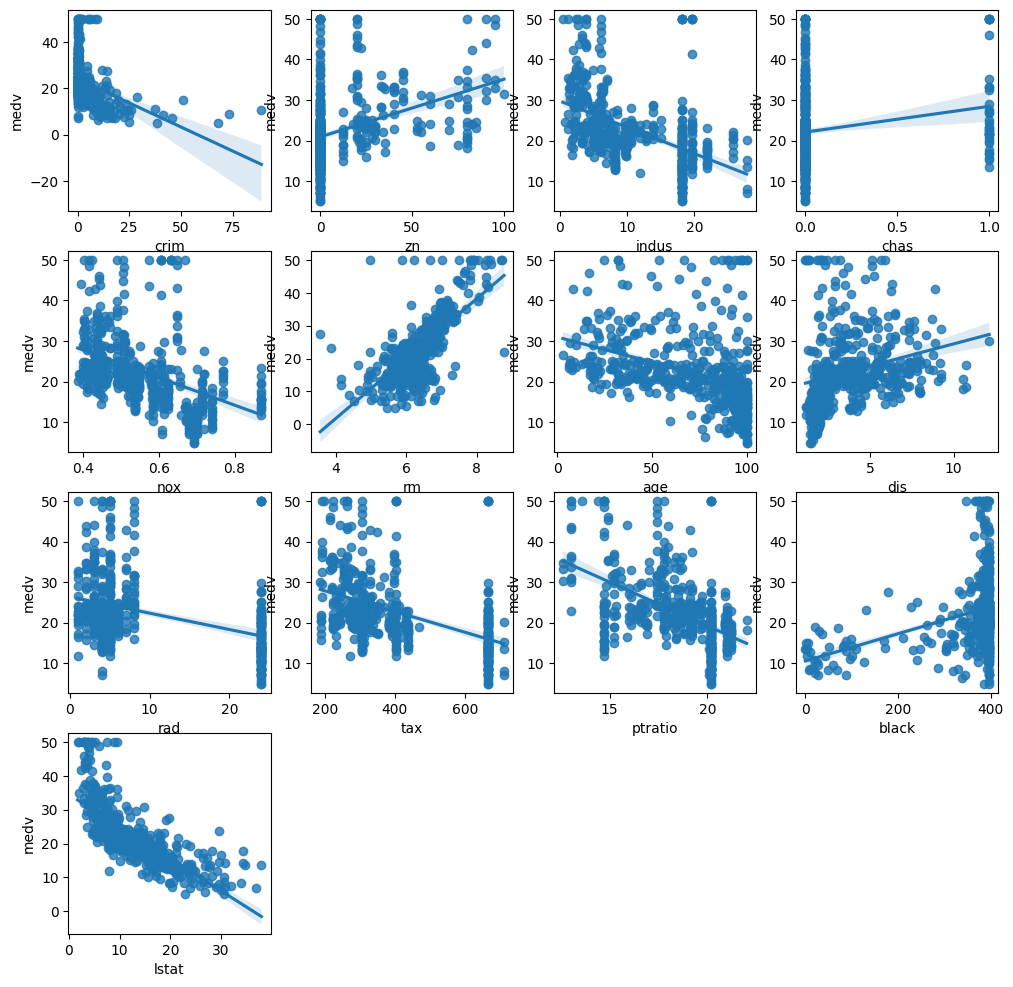

In [ ]:
plt.figure(figsize=(12,12))
for idx, col in enumerate(plot_cols[1:]):
  ax1=plt.subplot(4,4, idx+1)
  sns.regplot(x=col, y=plot_cols[0], data=dat, ax=ax1)
plt.show()

In [ ]:
X_training , X_testing , y_training , y_testing = train_test_split(X , y , test_size=0.2 , random_state=0)

In [ ]:
knn_clf  = KNeighborsClassifier(n_neighbors=4) #K최근접이웃
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)#배깅-랜덤포레스트
dt_clf = DecisionTreeClassifier() #결정트리
ada_clf = AdaBoostClassifier(n_estimators=100) #부스팅-아다부스트
lrc= LogisticRegression()#로지스틱회귀

In [ ]:
knn_clf.fit(X_training, y_training)  
rf_clf.fit(X_training , y_training)  
dt_clf.fit(X_training , y_training)
ada_clf.fit(X_training, y_training)
lrc.fit(X_training, y_training)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-43-8216a6d06fd9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_training , y_training)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

LogisticRegression()

In [ ]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_testing)
rf_pred = rf_clf.predict(X_testing)
dt_pred = dt_clf.predict(X_testing)
ada_pred = ada_clf.predict(X_testing)
lrc_pred = lrc.predict(X_testing)

성능평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def eval_model(test_gths,test_preds):#accuracy, precision, recall, f1_score를 한번에 호출해주는 함수 제작
  accuracy = accuracy_score(test_preds, test_gths)
  precision = precision_score(test_gths, test_preds,average='macro')
  recall = recall_score(test_gths, test_preds,average='macro')
  f1 = f1_score(test_gths, test_preds,average='macro')

  print("accuracy : {}, \nprescision : {}\nrecall : {}, \nf1-score : {}".format(accuracy,precision,recall,f1))

In [ ]:
print("K최근접이웃")
eval_model(y_testing, knn_pred)
print("-----------------------------------------")
print("배깅-랜덤포레스트")
eval_model(y_testing, rf_pred)
print("-----------------------------------------")
print("결정트리")
eval_model(y_testing, dt_pred)
print("-----------------------------------------")
print("부스팅-아다부스트")
eval_model(y_testing, ada_pred)
print("-----------------------------------------")
print("로지스틱회귀")
eval_model(y_testing, lrc_pred)
print("-----------------------------------------")

K최근접이웃
accuracy : 0.16666666666666666, 
prescision : 0.12094757094757094
recall : 0.13193658193658192, 
f1-score : 0.11079205738648464
-----------------------------------------
배깅-랜덤포레스트
accuracy : 0.16666666666666666, 
prescision : 0.12836940836940836
recall : 0.09516657945229373, 
f1-score : 0.09306328592042878
-----------------------------------------
결정트리
accuracy : 0.12745098039215685, 
prescision : 0.06430839002267573
recall : 0.07634397348683064, 
f1-score : 0.06720562228081026
-----------------------------------------
부스팅-아다부스트
accuracy : 0.06862745098039216, 
prescision : 0.0060156732676486845
recall : 0.07407407407407407, 
f1-score : 0.010971874129768867
-----------------------------------------
로지스틱회귀


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

accuracy : 0.08823529411764706, 
prescision : 0.04527914614121511
recall : 0.0760536398467433, 
f1-score : 0.050799892451435104
-----------------------------------------


어째서인지,,, 성능지표가 싹다 낮게...나왔다. 

...

하드보팅

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=0.1,gamma=0.003, probability=True, random_state=35)
svm.fit(X_training , y_training)
svm_pred = svm.predict(X_testing)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(estimators=[('decision_tree',dt_clf),('knn',knn_clf),('svm',svm)],voting='hard')

voting_clf.fit(X_training , y_training)  

hardvoting_pred = voting_clf.predict(X_testing)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
print("하드보팅")
eval_model(y_testing, hardvoting_pred)

하드보팅
accuracy : 0.11764705882352941, 
prescision : 0.13212481962481962
recall : 0.12077446363160649, 
f1-score : 0.08791950113378687


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


소프트보팅

In [ ]:
voting_clf2 = VotingClassifier(estimators=[('decision_tree',dt_clf),('knn',knn_clf),('svm',svm)],voting='soft')

voting_clf2.fit(X_training , y_training)  

softvoting_pred = voting_clf.predict(X_testing)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
print("소프트보팅")
eval_model(y_testing, softvoting_pred)

소프트보팅
accuracy : 0.11764705882352941, 
prescision : 0.13212481962481962
recall : 0.12077446363160649, 
f1-score : 0.08791950113378687


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
